<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:30px">Heart Disease Prediction with Logistic Regression</p>
<p></p>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline
sns.set_style('whitegrid')

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Import data set 'framingham.csv' to dataframe heart_df</p>

In [6]:
heart_df = pd.read_csv('framingham.csv')

In [7]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Drop column 'education' since which has no significant relationship on disease prediction</p>

In [8]:
heart_df.drop('education', axis=1, inplace=True)

In [9]:
heart_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
heart_df.rename(columns={'male':'sex_male'}, inplace=True)

In [11]:
heart_df.columns

Index(['sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Check for Null values</p>

In [12]:
heart_df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Check for total number of rows having Null records</p>

In [13]:
count = 0
for i in heart_df.isnull().sum(axis=1):
    if i > 0:
        count = count + 1

print('Count:', count)

Count: 489


<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Drop Null records</p>

In [14]:
heart_df.dropna(inplace=True)

In [15]:
heart_df.describe()

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:25px">Exploratory Data Analysis</p>

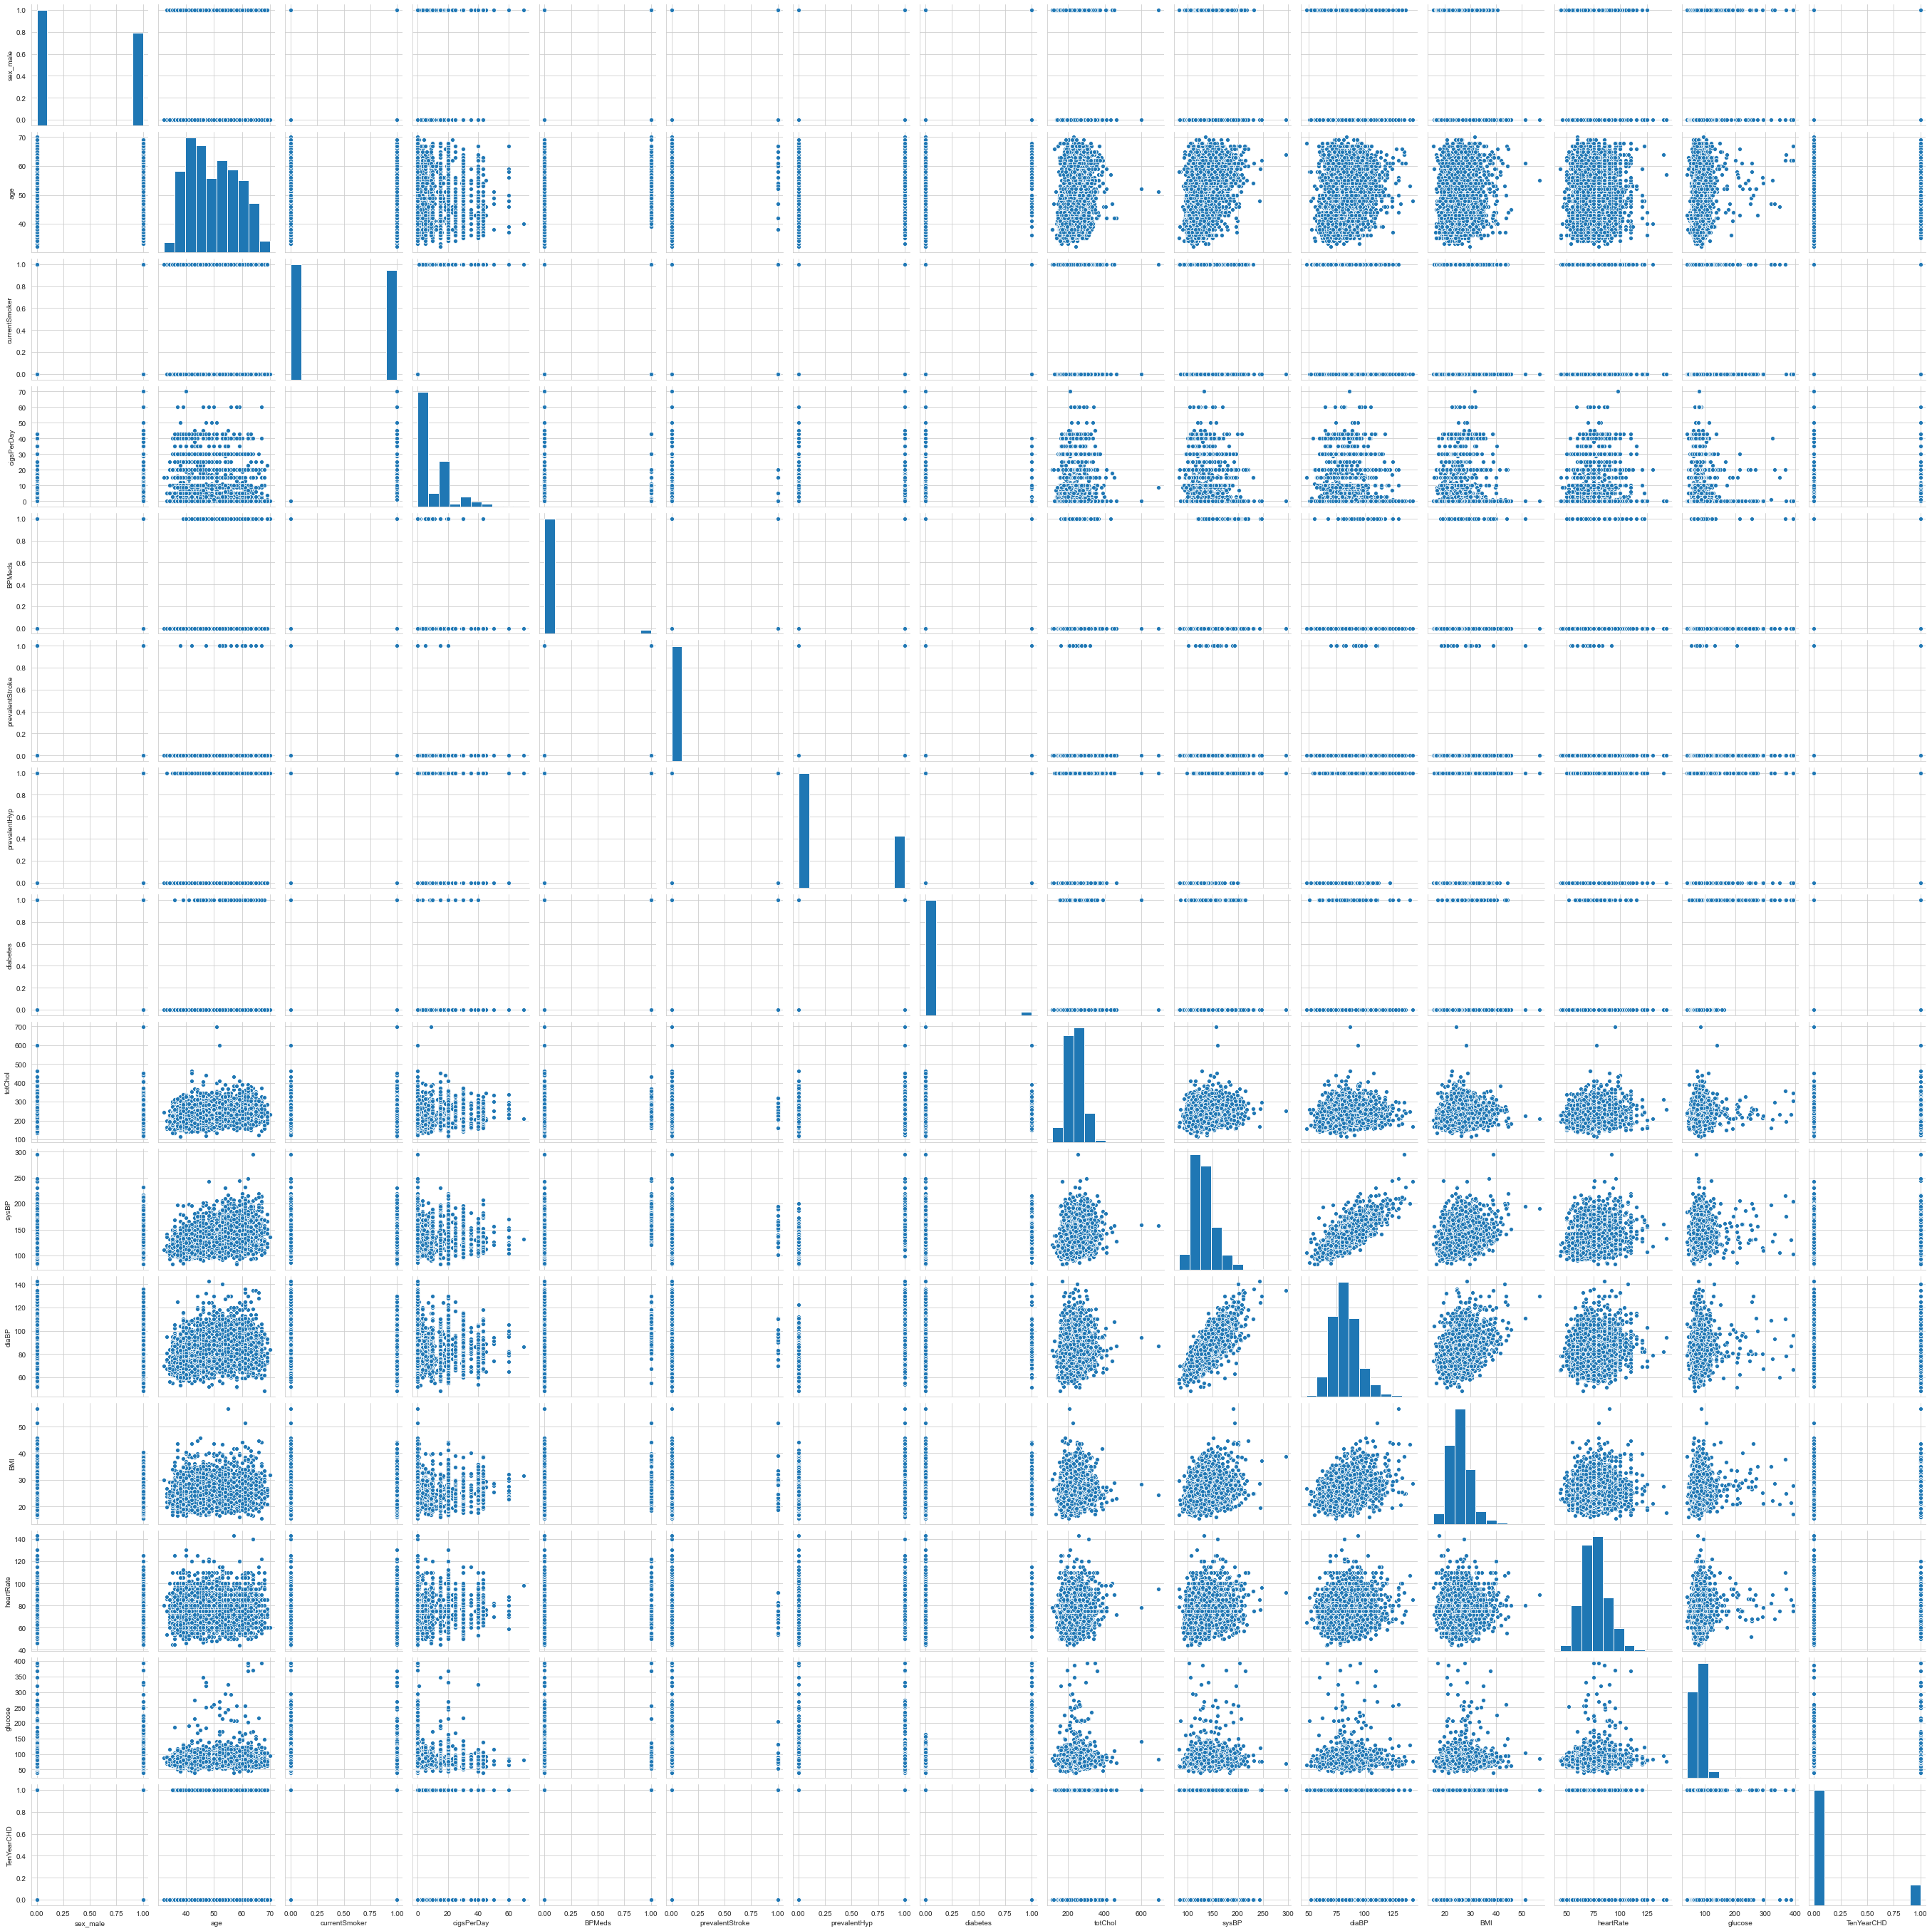

In [16]:
sns.pairplot(heart_df)

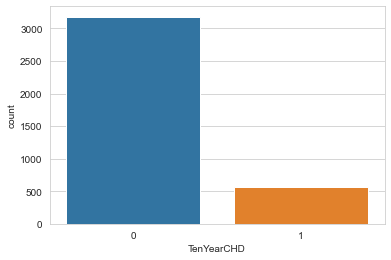

In [17]:
sns.countplot(x='TenYearCHD', data=heart_df)

In [19]:
def draw_histogram(dataframe, features, rows, cols):
    
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        print(i, '- ', feature)
        ax = plt.subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature + " Distribution",color='DarkRed')
    
    fig.tight_layout()
    plt.show()

0 -  sex_male
1 -  age
2 -  currentSmoker
3 -  cigsPerDay
4 -  BPMeds
5 -  prevalentStroke
6 -  prevalentHyp
7 -  diabetes
8 -  totChol
9 -  sysBP
10 -  diaBP
11 -  BMI
12 -  heartRate
13 -  glucose
14 -  TenYearCHD


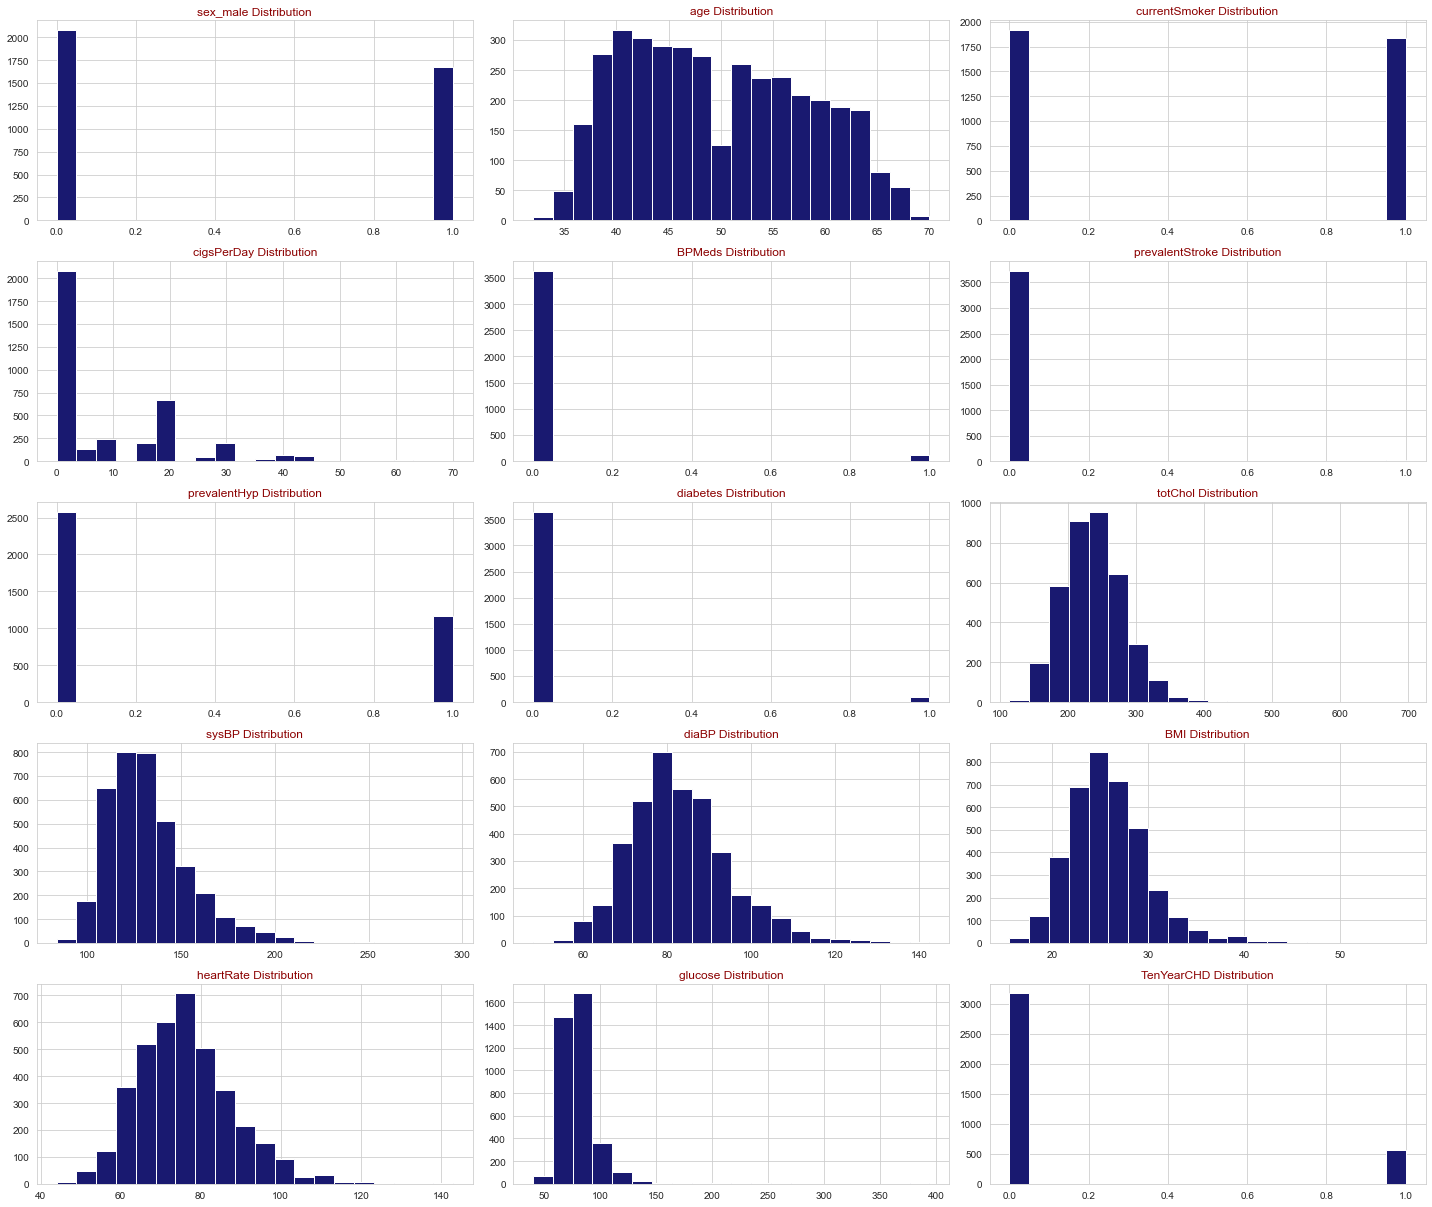

In [20]:
draw_histogram(heart_df, heart_df.columns, 6, 3)

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:25px">Build and Train Model</p>

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#heart_df.columns
X = heart_df.drop('TenYearCHD', axis=1)
y = heart_df['TenYearCHD']

In [23]:
X.shape
y.shape

(3751,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [28]:
logmodel.fit(X_train, y_train)

c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predictions = logmodel.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Confusion Metrics</p>

[[1064   11]
 [ 155    8]]


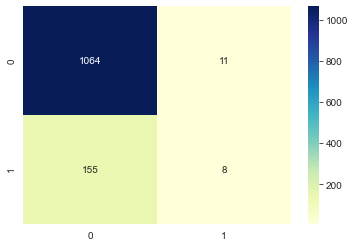

In [63]:
print(confusion_matrix(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="YlGnBu", fmt='d')

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Classification Report</p>

In [32]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1222
           1       0.04      0.44      0.08        16

    accuracy                           0.87      1238
   macro avg       0.52      0.65      0.50      1238
weighted avg       0.98      0.87      0.92      1238



<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Grid Search Implementation</p>

In [33]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'C': [1, 10, 100, 1000]}

In [57]:
logmodel_grid = GridSearchCV(LogisticRegression(), param_grid, verbose=2)

In [58]:
logmodel_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

[CV] .............................................. C=1, total=   0.1s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................


c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extr

[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.1s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................


c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extr

[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.1s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=1000 ..........................................................


c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extr

[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.0s
[CV] C=1000 ..........................................................
[CV] ........................................... C=1000, total=   0.1s


c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
c:\python\dev\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

In [59]:
predictions = logmodel_grid.predict(X_test)

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Confusion Metrics</p>

[[1064   11]
 [ 155    8]]


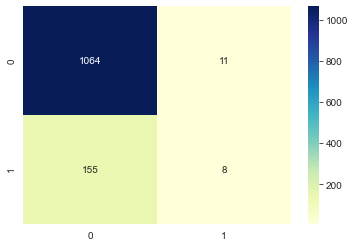

In [60]:
print(confusion_matrix(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="YlGnBu", fmt='d')

<p></p>
<p style="color:#006699; font-family:'Comic Sans MS'; font-size:20px">Classification Report</p>

In [61]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1219
           1       0.05      0.42      0.09        19

    accuracy                           0.87      1238
   macro avg       0.52      0.65      0.51      1238
weighted avg       0.98      0.87      0.91      1238



In [62]:
logmodel_grid.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
logmodel_grid.best_params_

{'C': 100}